In [38]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [39]:
df_train = pd.read_csv('../dataset/fulltrain.csv', encoding='utf-8', names=['label', 'text'])
df_test = pd.read_csv('../dataset/balancedtest.csv', encoding='utf-8', names=['label', 'text'])
df_covid_test = pd.read_csv('../fake_covid_dataset/covid_unreliable_news_cleaned.csv', encoding='utf-8')

In [40]:
X_train = df_train['text']
y_train = df_train['label']
X_test = df_test['text']
y_test = df_test['label']

In [41]:
clf = DummyClassifier(strategy='uniform', random_state=0)
clf.fit(X_train, y_train)

DummyClassifier(random_state=0, strategy='uniform')

              precision    recall  f1-score   support

           1       0.26      0.26      0.26       750
           2       0.26      0.27      0.26       750
           3       0.24      0.23      0.24       750
           4       0.27      0.28      0.27       750

    accuracy                           0.26      3000
   macro avg       0.26      0.26      0.26      3000
weighted avg       0.26      0.26      0.26      3000



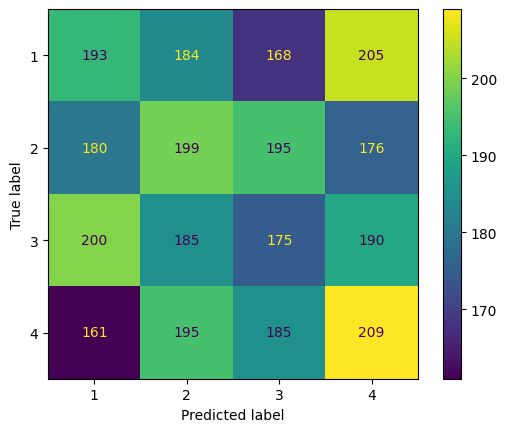

In [42]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()


In [43]:
df_covid_test

,class,content_text
0,Reliable News,It is likely that eventually it will become en...
1,Reliable News,Our researchers are committed to ending the CO...
2,Reliable News,Could the pandemic of the century have been av...
3,Reliable News,"Coronavirus disease 2019, or COVID-19, is a ne..."
4,Reliable News,"Children, including very young children, can d..."
...,...,...
115,Satire,Rushing to assure the country’s populace ahead...
116,Satire,As the city grappled with measures that would ...
117,Satire,Utterly disregarding the Centers for Disease C...
118,Satire,Following this week’s news that the immunizati...


In [44]:
X_test_covid = df_covid_test['content_text']
labels = {'Satire': 1, 'Hoax': 2, 'Propaganda': 3, 'Reliable News': 4}
y_test_covid = [labels[x] for x in df_covid_test['class']]

              precision    recall  f1-score   support

           1       0.32      0.35      0.34        31
           2       0.28      0.23      0.25        30
           3       0.26      0.21      0.23        29
           4       0.24      0.30      0.26        30

    accuracy                           0.28       120
   macro avg       0.28      0.27      0.27       120
weighted avg       0.28      0.28      0.27       120



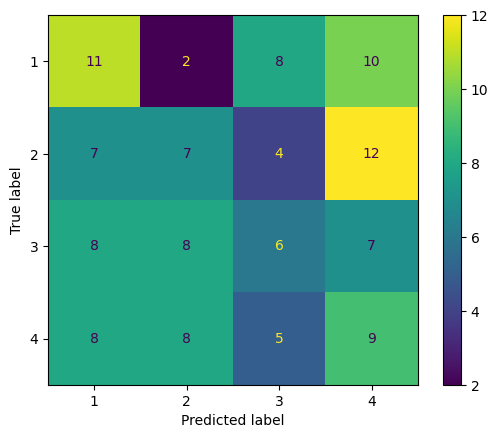

In [45]:
y_pred_covid = clf.predict(X_test_covid)
print(classification_report(y_test_covid, y_pred_covid))
cm = confusion_matrix(y_test_covid, y_pred_covid, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()
